# Prediction of causes of Major outages

**Name(s)**: Touzi Ali

**Website Link**: https://ali-tz.github.io/Prediction-of-Power-outages-causes/ 

## Code

This first part comes from the frist part program at https://github.com/Ali-tz/Does-climate-region-in-the-us-influences-power-outages- .

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import plotly.express as px
pd.options.plotting.backend = 'plotly'

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


### Framing the Problem

### Cleaning and EDA

In [4]:
pow_outage = pd.read_excel('data/outage.xlsx')
pow_outage.head(10)

,Major power outage events in the continental U.S.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Time period: January 2000 - July 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Regions affected: Outages reported in this dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
5,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,numeric,NaN,...,%,%,persons per square mile,persons per square mile,persons per square mile,%,%,%,%,%
6,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
7,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
8,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
9,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


### Data Cleaning

This raw dataset is not easy to read at this point, let's clean it up a little:
-  The first 4 lines represents the title in the excel file, we are only intersted by the fursished tab below. Moreover, we notice we don't have title for our columns because of that, looking depper the columns titles are at the line index 4. 
- The unit columns is useless, and the first line of the dataset is annoying for future manipulation, we will normalize proportions and for densities denote them in their respective column title. Numeric values will remain the same as the information of numeric seems to be quite obvious facing numbers.
- we have two columns for start time (date and time separately) and the same goes on for the restoration date, let's merge this two columns into a signle information.

We will denote this three steps as Cleaning step 1, Cleaning step 2, and Cleaning step 3.

#### Cleaning step1

In [5]:
pow_outage.columns = pow_outage.iloc[4]
pow_outage = pow_outage.reset_index(drop=True)
pow_outage.head(10)

4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,Time period: January 2000 - July 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Regions affected: Outages reported in this dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
5,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,numeric,NaN,...,%,%,persons per square mile,persons per square mile,persons per square mile,%,%,%,%,%
6,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
7,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
8,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
9,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


In [6]:
pow_outage = pow_outage.drop(pow_outage.index[:5]).reset_index(drop=True)
pow_outage.head(10)

4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,numeric,NaN,...,%,%,persons per square mile,persons per square mile,persons per square mile,%,%,%,%,%
1,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
2,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
3,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
4,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
5,NaN,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
6,NaN,6,2010,11,Minnesota,MN,MRO,East North Central,-1.4,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
7,NaN,7,2010,7,Minnesota,MN,MRO,East North Central,-0.9,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
8,NaN,8,2005,6,Minnesota,MN,MRO,East North Central,0.2,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
9,NaN,9,2015,3,Minnesota,MN,MRO,East North Central,0.6,warm,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


#### Cleaning step 2

First, lets normalize columns with proportions.

In [7]:
is_percent = pow_outage.iloc[0].apply(lambda x: isinstance(x, str) and '%' in x)
proportion_columns = pow_outage.columns[is_percent]
pow_outage[proportion_columns] = pow_outage[proportion_columns].applymap(lambda x : float(x)/100 if x!= '%' else x)
pow_outage.head()


4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,numeric,NaN,...,%,%,persons per square mile,persons per square mile,persons per square mile,%,%,%,%,%
1,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,0.7327,0.1528,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787
2,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,0.7327,0.1528,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787
3,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,0.7327,0.1528,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787
4,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,0.7327,0.1528,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787


Now let's rename the columns name by adding their density in the title

In [8]:
is_density = pow_outage.iloc[0].apply(lambda x: isinstance(x, str) and not '%' in x)
density_columns = pow_outage.columns[is_density]
densities = pow_outage[density_columns].iloc[0]
n = len(densities)
renamed_columns = {density_columns[i] : f'{density_columns[i]} ({densities[i]})' for i in range(n)}
pow_outage = pow_outage.rename(columns=renamed_columns)
pow_outage.head()

4,variables (Units),OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL (numeric),CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN (persons per square mile),POPDEN_UC (persons per square mile),POPDEN_RURAL (persons per square mile),AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,numeric,NaN,...,%,%,persons per square mile,persons per square mile,persons per square mile,%,%,%,%,%
1,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,0.7327,0.1528,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787
2,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,0.7327,0.1528,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787
3,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,0.7327,0.1528,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787
4,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,0.7327,0.1528,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787


Let's finalize this step by droping the first line and the first columns as they are now both useless.

In [9]:
pow_outage = pow_outage.drop(pow_outage.columns[0], axis=1)
pow_outage = pow_outage.iloc[1:]

In [10]:
pow_outage.head()
pow_outage.shape

(1534, 56)

#### Cleaning step 3

First let's clean up the start date by creating the new columns

In [11]:
pow_outage.columns

Index(['OBS', 'YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL (numeric)', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE (Day of the week, Month Day, Year)',
       'OUTAGE.START.TIME (Hour:Minute:Second (AM / PM))',
       'OUTAGE.RESTORATION.DATE (Day of the week, Month Day, Year)',
       'OUTAGE.RESTORATION.TIME (Hour:Minute:Second (AM / PM))',
       'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES',
       'OUTAGE.DURATION (mins)', 'DEMAND.LOSS.MW (Megawatt)',
       'CUSTOMERS.AFFECTED', 'RES.PRICE (cents / kilowatt-hour)',
       'COM.PRICE (cents / kilowatt-hour)',
       'IND.PRICE (cents / kilowatt-hour)',
       'TOTAL.PRICE (cents / kilowatt-hour)', 'RES.SALES (Megawatt-hour)',
       'COM.SALES (Megawatt-hour)', 'IND.SALES (Megawatt-hour)',
       'TOTAL.SALES (Megawatt-hour)', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN',
       'RES.CUSTOMERS', 'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS',
       'RES.CUS

In [12]:
pow_outage[['OUTAGE.START.DATE (Day of the week, Month Day, Year)', 'OUTAGE.START.TIME (Hour:Minute:Second (AM / PM))']]

4,"OUTAGE.START.DATE (Day of the week, Month Day, Year)",OUTAGE.START.TIME (Hour:Minute:Second (AM / PM))
1,2011-07-01 00:00:00,17:00:00
2,2014-05-11 00:00:00,18:38:00
3,2010-10-26 00:00:00,20:00:00
4,2012-06-19 00:00:00,04:30:00
5,2015-07-18 00:00:00,02:00:00
...,...,...
1530,2011-12-06 00:00:00,08:00:00
1531,NaN,NaN
1532,2009-08-29 00:00:00,22:54:00
1533,2009-08-29 00:00:00,11:00:00


In [13]:
#OUTAGE.START
pow_outage['OUTAGE.START.TIME (Hour:Minute:Second (AM / PM))'] = pd.to_datetime(pow_outage['OUTAGE.START.TIME (Hour:Minute:Second (AM / PM))'], format='%H:%M:%S', errors='coerce')
pow_outage['OUTAGE.START.TIME (Hour:Minute:Second (AM / PM))'] = pow_outage['OUTAGE.START.TIME (Hour:Minute:Second (AM / PM))'].dt.strftime('%H:%M:%S')

pow_outage['OUTAGE.START'] = pd.to_datetime(pow_outage['OUTAGE.START.DATE (Day of the week, Month Day, Year)'], errors='coerce') + pd.to_timedelta(pow_outage['OUTAGE.START.TIME (Hour:Minute:Second (AM / PM))'])

#OUTAGE.RESTORATION.TIME
pow_outage['OUTAGE.RESTORATION.TIME (Hour:Minute:Second (AM / PM))'] = pd.to_datetime(pow_outage['OUTAGE.RESTORATION.TIME (Hour:Minute:Second (AM / PM))'], format='%H:%M:%S', errors='coerce')
pow_outage['OUTAGE.RESTORATION.TIME (Hour:Minute:Second (AM / PM))'] = pow_outage['OUTAGE.RESTORATION.TIME (Hour:Minute:Second (AM / PM))'].dt.strftime('%H:%M:%S')

pow_outage['OUTAGE.RESTORATION.TIME'] = pd.to_datetime(pow_outage['OUTAGE.RESTORATION.DATE (Day of the week, Month Day, Year)'], errors='coerce') + pd.to_timedelta(pow_outage['OUTAGE.RESTORATION.TIME (Hour:Minute:Second (AM / PM))'])
pow_outage['OUTAGE.RESTORATION.TIME']

1      2011-07-03 20:00:00
2      2014-05-11 18:39:00
3      2010-10-28 22:00:00
4      2012-06-20 23:00:00
5      2015-07-19 07:00:00
               ...        
1530   2011-12-06 20:00:00
1531                   NaT
1532   2009-08-29 23:53:00
1533   2009-08-29 14:01:00
1534                   NaT
Name: OUTAGE.RESTORATION.TIME, Length: 1534, dtype: datetime64[ns]

Now let's drop the useless columns.

In [14]:
pow_outage = pow_outage.drop(columns=['OUTAGE.START.DATE (Day of the week, Month Day, Year)',
       'OUTAGE.START.TIME (Hour:Minute:Second (AM / PM))',
       'OUTAGE.RESTORATION.DATE (Day of the week, Month Day, Year)',
       'OUTAGE.RESTORATION.TIME (Hour:Minute:Second (AM / PM))'])

In [15]:
pow_outage.head()

4,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL (numeric),CLIMATE.CATEGORY,CAUSE.CATEGORY,...,POPDEN_URBAN (persons per square mile),POPDEN_UC (persons per square mile),POPDEN_RURAL (persons per square mile),AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION.TIME
1,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,...,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787,2011-07-01 17:00:00,2011-07-03 20:00:00
2,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,...,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787,2014-05-11 18:38:00,2014-05-11 18:39:00
3,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,...,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787,2010-10-26 20:00:00,2010-10-28 22:00:00
4,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,...,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787,2012-06-19 04:30:00,2012-06-20 23:00:00
5,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,...,2279,1700.5,18.2,0.0214,0.006,0.915927,0.084073,0.054787,2015-07-18 02:00:00,2015-07-19 07:00:00


### Prédiction problem : Predict the cause of a major power outage

We will now create a second dataset, which will conatains the same informations but modified to be used in a model. In other word, we are gonig to preprocess our dataset.
We will first drop a few columns which are useless or redundant as the OBS column which is the number of the observation, which gives the same number as the index, the postal code, the hurricane names as it is not relevant for our questionand also the it is correlated to the month and the year.

In [16]:
pow_outage = pow_outage.drop(['OBS', 'POSTAL.CODE', 'HURRICANE.NAMES'], axis=1)

In [17]:
pow_outage.dtypes

4
YEAR                                              object
MONTH                                             object
U.S._STATE                                        object
NERC.REGION                                       object
CLIMATE.REGION                                    object
ANOMALY.LEVEL (numeric)                           object
CLIMATE.CATEGORY                                  object
CAUSE.CATEGORY                                    object
CAUSE.CATEGORY.DETAIL                             object
OUTAGE.DURATION (mins)                            object
DEMAND.LOSS.MW (Megawatt)                         object
CUSTOMERS.AFFECTED                                object
RES.PRICE (cents / kilowatt-hour)                 object
COM.PRICE (cents / kilowatt-hour)                 object
IND.PRICE (cents / kilowatt-hour)                 object
TOTAL.PRICE (cents / kilowatt-hour)               object
RES.SALES (Megawatt-hour)                         object
COM.SALES (Megawatt-hour)    

Except for the two last columns, all the columns are of type object, when they are supposed to be numbers (int or float). This will lead to a poor result using the function pd.get_dummies to one hot ecode all categorical columns, as all of them are in this case.
Let's update our dataframe to avoid this issue.

In [18]:
pow_outage['YEAR'] = pow_outage['YEAR'].astype(int)
pow_outage['MONTH'] = pow_outage['MONTH'].astype(float)
pow_outage['ANOMALY.LEVEL (numeric)'] = pow_outage['ANOMALY.LEVEL (numeric)'].astype(float)
pow_outage['OUTAGE.DURATION (mins)'] = pow_outage['OUTAGE.DURATION (mins)'].astype(float)
pow_outage['DEMAND.LOSS.MW (Megawatt)'] = pow_outage['DEMAND.LOSS.MW (Megawatt)'].astype(float)
pow_outage['CUSTOMERS.AFFECTED'] = pow_outage['CUSTOMERS.AFFECTED'].astype(float)
pow_outage['RES.PRICE (cents / kilowatt-hour)'] = pow_outage['RES.PRICE (cents / kilowatt-hour)'].astype(float)
pow_outage['COM.PRICE (cents / kilowatt-hour)'] = pow_outage['COM.PRICE (cents / kilowatt-hour)'].astype(float)
pow_outage['IND.PRICE (cents / kilowatt-hour)'] = pow_outage['IND.PRICE (cents / kilowatt-hour)'].astype(float)
pow_outage['IND.PRICE (cents / kilowatt-hour)'] = pow_outage['IND.PRICE (cents / kilowatt-hour)'].astype(float)
pow_outage['TOTAL.PRICE (cents / kilowatt-hour)'] = pow_outage['TOTAL.PRICE (cents / kilowatt-hour)'].astype(float)
pow_outage['RES.SALES (Megawatt-hour)'] = pow_outage['RES.SALES (Megawatt-hour)'].astype(float)
pow_outage['COM.SALES (Megawatt-hour)'] = pow_outage['COM.SALES (Megawatt-hour)'].astype(float)
pow_outage['IND.SALES (Megawatt-hour)'] = pow_outage['IND.SALES (Megawatt-hour)'].astype(float)
pow_outage['TOTAL.SALES (Megawatt-hour)'] = pow_outage['TOTAL.SALES (Megawatt-hour)'].astype(float)
pow_outage['RES.PERCEN'] = pow_outage['RES.PERCEN'].astype(float)
pow_outage['COM.PERCEN'] = pow_outage['COM.PERCEN'].astype(float)
pow_outage['IND.PERCEN'] = pow_outage['IND.PERCEN'].astype(float)
pow_outage['RES.CUSTOMERS'] = pow_outage['RES.CUSTOMERS'].astype(float)
pow_outage['COM.CUSTOMERS'] = pow_outage['COM.CUSTOMERS'].astype(float)
pow_outage['IND.CUSTOMERS'] = pow_outage['IND.CUSTOMERS'].astype(float)
pow_outage['TOTAL.CUSTOMERS'] = pow_outage['TOTAL.CUSTOMERS'].astype(float)
pow_outage['RES.CUST.PCT'] = pow_outage['RES.CUST.PCT'].astype(float)
pow_outage['COM.CUST.PCT'] = pow_outage['COM.CUST.PCT'].astype(float)
pow_outage['IND.CUST.PCT'] = pow_outage['IND.CUST.PCT'].astype(float)
pow_outage['PC.REALGSP.STATE (USD)'] = pow_outage['PC.REALGSP.STATE (USD)'].astype(float)
pow_outage['PC.REALGSP.USA (USD)'] = pow_outage['PC.REALGSP.USA (USD)'].astype(float)
pow_outage['PC.REALGSP.REL (fraction)'] = pow_outage['PC.REALGSP.REL (fraction)'].astype(float)
pow_outage['PC.REALGSP.CHANGE'] = pow_outage['PC.REALGSP.CHANGE'].astype(float)
pow_outage['UTIL.REALGSP (USD)'] = pow_outage['UTIL.REALGSP (USD)'].astype(float)
pow_outage['TOTAL.REALGSP (USD)'] = pow_outage['TOTAL.REALGSP (USD)'].astype(float)
pow_outage['UTIL.CONTRI'] = pow_outage['UTIL.CONTRI'].astype(float)
pow_outage['PI.UTIL.OFUSA'] = pow_outage['PI.UTIL.OFUSA'].astype(float)
pow_outage['POPULATION'] = pow_outage['POPULATION'].astype(float)
pow_outage['POPPCT_URBAN'] = pow_outage['POPPCT_URBAN'].astype(float)
pow_outage['POPPCT_UC'] = pow_outage['POPPCT_UC'].astype(float)
pow_outage['POPDEN_URBAN (persons per square mile)'] = pow_outage['POPDEN_URBAN (persons per square mile)'].astype(float)
pow_outage['POPDEN_UC (persons per square mile)'] = pow_outage['POPDEN_UC (persons per square mile)'].astype(float)
pow_outage['POPDEN_RURAL (persons per square mile)'] = pow_outage['POPDEN_RURAL (persons per square mile)'].astype(float)
pow_outage['AREAPCT_URBAN'] = pow_outage['AREAPCT_URBAN'].astype(float)
pow_outage['AREAPCT_UC'] = pow_outage['AREAPCT_UC'].astype(float)
pow_outage['PCT_LAND'] = pow_outage['PCT_LAND'].astype(float)
pow_outage['PCT_WATER_TOT'] = pow_outage['PCT_WATER_TOT'].astype(float)
pow_outage['PCT_WATER_INLAND'] = pow_outage['PCT_WATER_INLAND'].astype(float)
   

pow_outage.dtypes

4
YEAR                                               int64
MONTH                                            float64
U.S._STATE                                        object
NERC.REGION                                       object
CLIMATE.REGION                                    object
ANOMALY.LEVEL (numeric)                          float64
CLIMATE.CATEGORY                                  object
CAUSE.CATEGORY                                    object
CAUSE.CATEGORY.DETAIL                             object
OUTAGE.DURATION (mins)                           float64
DEMAND.LOSS.MW (Megawatt)                        float64
CUSTOMERS.AFFECTED                               float64
RES.PRICE (cents / kilowatt-hour)                float64
COM.PRICE (cents / kilowatt-hour)                float64
IND.PRICE (cents / kilowatt-hour)                float64
TOTAL.PRICE (cents / kilowatt-hour)              float64
RES.SALES (Megawatt-hour)                        float64
COM.SALES (Megawatt-hour)    

Looks better now.

### Baseline Model

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Recall we want to predict the cause of major outage. Therefore let's adress our target data.

In [20]:
pow_outage['CAUSE.CATEGORY'].unique()

array(['severe weather', 'intentional attack',
       'system operability disruption', 'equipment failure',
       'public appeal', 'fuel supply emergency', 'islanding'],
      dtype=object)

In [22]:
y = pow_outage['CAUSE.CATEGORY']

As we are looking for the cause category, which are described above, the feature we will consider first will be CLIMATE.REGION, MONTH, TOTAL.PRICE (cents / kilowatt-hour), TOTAL.SALES (Megawatt-hour), POPPCT_UC

In [24]:
X = pow_outage[['CLIMATE.REGION', 'MONTH', 'TOTAL.PRICE (cents / kilowatt-hour)', 'TOTAL.SALES (Megawatt-hour)', 'POPPCT_UC']]

In [25]:
Xy =  pow_outage[['CAUSE.CATEGORY','CLIMATE.REGION', 'MONTH', 'TOTAL.PRICE (cents / kilowatt-hour)', 'TOTAL.SALES (Megawatt-hour)', 'POPPCT_UC']]

We have to check for null values to be able to fit our model.

In [26]:
print(X.isnull().sum())
X.shape

4
CLIMATE.REGION                          6
MONTH                                   9
TOTAL.PRICE (cents / kilowatt-hour)    22
TOTAL.SALES (Megawatt-hour)            22
POPPCT_UC                               0
dtype: int64


(1534, 5)

As the number of NaN value is small, we will drop these.

In [27]:
Xy = Xy.dropna()


# We update our target and our features as a consequence
X = Xy[['CLIMATE.REGION', 'MONTH', 'TOTAL.PRICE (cents / kilowatt-hour)', 
        'TOTAL.SALES (Megawatt-hour)', 'POPPCT_UC']]
y = Xy['CAUSE.CATEGORY']

X.isnull().sum()

4
CLIMATE.REGION                         0
MONTH                                  0
TOTAL.PRICE (cents / kilowatt-hour)    0
TOTAL.SALES (Megawatt-hour)            0
POPPCT_UC                              0
dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's create our pipeline:

In [29]:
preproc = ColumnTransformer(
    transformers=[
        ('categorical_cols', OneHotEncoder(), ['CLIMATE.REGION', 'MONTH'])
    ], 
    remainder= 'passthrough'
)

pl = Pipeline([
    ('preprocessor', preproc), 
    ('lin-reg', RandomForestClassifier())
])


scores = cross_val_score(pl, X, y, cv=5, scoring='accuracy')

In [30]:
# accuracy = pl.score(X_test, y_test)
# print("Baseline model accuracy:", accuracy)

print("Cross-validation scores:", scores)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = pl.fit(X_train, y_train)
y_pred = cross_val_predict(pl, X, y, cv=5)
print(f'Accuracy score = {metrics.accuracy_score(y, y_pred)}')
print("Standard deviation:", scores.std())
precision = metrics.precision_score(y, y_pred, average='macro')
recall = metrics.recall_score(y, y_pred, average='macro')
print(f'Precision score = {precision}')
print(f'Discovery rate = {1 - precision}')
print(f'Recall score = {recall}')
print(f'False negative rate = {1 - precision}')
print(f'F1-score = {2*precision*recall/(precision+recall)}')

Cross-validation scores: [0.57615894 0.44039735 0.37873754 0.3255814  0.49833887]
Mean accuracy: 0.4438428197399397
Standard deviation: 0.08799285008654457
Accuracy score = 0.4432647644326476
Precision score = 0.2618441936290393
Discovery rate = 0.7381558063709607
Recall score = 0.24335251591669316
False negative rate = 0.7381558063709607
F1-score = 0.25225993001855146


### Final Model

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



We chose our new features.

In [32]:
Xy =  pow_outage[['CAUSE.CATEGORY','CAUSE.CATEGORY.DETAIL', 'CLIMATE.CATEGORY','ANOMALY.LEVEL (numeric)','PC.REALGSP.CHANGE', 
                  'POPDEN_URBAN (persons per square mile)','POPDEN_UC (persons per square mile)',
                  'POPDEN_RURAL (persons per square mile)','CLIMATE.REGION', 
                  'MONTH', 'TOTAL.PRICE (cents / kilowatt-hour)', 'TOTAL.SALES (Megawatt-hour)', 
                  'POPPCT_UC', 'OUTAGE.DURATION (mins)', 'CUSTOMERS.AFFECTED', 'PCT_WATER_TOT',
                    'PCT_WATER_INLAND', 'U.S._STATE', 'DEMAND.LOSS.MW (Megawatt)','TOTAL.CUSTOMERS']]

#

In [34]:
print(Xy.isnull().sum())
Xy.shape


4
CAUSE.CATEGORY                              0
CAUSE.CATEGORY.DETAIL                     471
CLIMATE.CATEGORY                            9
ANOMALY.LEVEL (numeric)                     9
PC.REALGSP.CHANGE                           0
POPDEN_URBAN (persons per square mile)      0
POPDEN_UC (persons per square mile)        10
POPDEN_RURAL (persons per square mile)     10
CLIMATE.REGION                              6
MONTH                                       9
TOTAL.PRICE (cents / kilowatt-hour)        22
TOTAL.SALES (Megawatt-hour)                22
POPPCT_UC                                   0
OUTAGE.DURATION (mins)                     58
CUSTOMERS.AFFECTED                        443
PCT_WATER_TOT                               0
PCT_WATER_INLAND                            0
U.S._STATE                                  0
DEMAND.LOSS.MW (Megawatt)                 705
TOTAL.CUSTOMERS                             0
dtype: int64


(1534, 20)

There are to many missing values in CUSTOMERS.AFFECTED, we can not drop these values.

In [35]:
Xy[Xy['CUSTOMERS.AFFECTED'].isnull()][['CAUSE.CATEGORY', 'OUTAGE.DURATION (mins)']]

4,CAUSE.CATEGORY,OUTAGE.DURATION (mins)
2,intentional attack,1.0
16,system operability disruption,19.0
17,intentional attack,0.0
18,system operability disruption,21.0
21,severe weather,935.0
...,...,...
1526,intentional attack,870.0
1529,system operability disruption,220.0
1531,fuel supply emergency,NaN
1532,islanding,59.0


All cause category are here, let's replace the NaN by the mean value.

In [36]:
mean = np.mean(Xy['CUSTOMERS.AFFECTED'])
Xy['CUSTOMERS.AFFECTED'].fillna(mean, inplace=True)
Xy['CAUSE.CATEGORY.DETAIL'].fillna('Unknown', inplace=True)

/home/ali-tz/anaconda3/envs/dsc80/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
Xy = Xy.dropna()

# We update our target and our features as a consequence
X = Xy[['ANOMALY.LEVEL (numeric)','CAUSE.CATEGORY.DETAIL', 'CLIMATE.CATEGORY', 'PC.REALGSP.CHANGE', 
                  'POPDEN_URBAN (persons per square mile)','POPDEN_UC (persons per square mile)',
                  'POPDEN_RURAL (persons per square mile)','CLIMATE.REGION', 
                  'MONTH', 'TOTAL.PRICE (cents / kilowatt-hour)', 'TOTAL.SALES (Megawatt-hour)', 
                  'POPPCT_UC', 'OUTAGE.DURATION (mins)', 'CUSTOMERS.AFFECTED', 'PCT_WATER_TOT', 'PCT_WATER_INLAND', 
                   'DEMAND.LOSS.MW (Megawatt)', 'TOTAL.CUSTOMERS']]
y = Xy['CAUSE.CATEGORY']

X.isnull().sum()

4
ANOMALY.LEVEL (numeric)                   0
CAUSE.CATEGORY.DETAIL                     0
CLIMATE.CATEGORY                          0
PC.REALGSP.CHANGE                         0
POPDEN_URBAN (persons per square mile)    0
POPDEN_UC (persons per square mile)       0
POPDEN_RURAL (persons per square mile)    0
CLIMATE.REGION                            0
MONTH                                     0
TOTAL.PRICE (cents / kilowatt-hour)       0
TOTAL.SALES (Megawatt-hour)               0
POPPCT_UC                                 0
OUTAGE.DURATION (mins)                    0
CUSTOMERS.AFFECTED                        0
PCT_WATER_TOT                             0
PCT_WATER_INLAND                          0
DEMAND.LOSS.MW (Megawatt)                 0
TOTAL.CUSTOMERS                           0
dtype: int64

We will now perform a quantil transform on ['ANOMALY.LEVEL (numeric)', 'POPDEN_URBAN (persons per square mile)', 'DEMAND.LOSS.MW (Megawatt)','PCT_WATER_INLAND', 'POPDEN_UC (persons per square mile)', 'POPDEN_RURAL (persons per square mile)', 'OUTAGE.DURATION (mins)'].
We will one hot encode 'CLIMATE.REGION', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY.DETAIL'.
Finally we will standardize 'PC.REALGSP.CHANGE'.

In [39]:
preproc = ColumnTransformer(
    transformers=[
        ('categorical_cols', OneHotEncoder(handle_unknown='ignore'), [ 'CLIMATE.REGION', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY.DETAIL']),
        ('quantile_transforms', QuantileTransformer(n_quantiles=4), ['ANOMALY.LEVEL (numeric)', 'POPDEN_URBAN (persons per square mile)',
                                                                     'DEMAND.LOSS.MW (Megawatt)','PCT_WATER_INLAND', 
                                                                     'POPDEN_UC (persons per square mile)',
                                                                    'POPDEN_RURAL (persons per square mile)',
                                                                    'OUTAGE.DURATION (mins)']),
        ('stdzization', StandardScaler(), ['PC.REALGSP.CHANGE'])
    ], 
    remainder= 'passthrough'
)
#,'OUTAGE.RESTORATION.TIME'



# scores = cross_val_score(pl, X, y, cv=5, scoring='accuracy')

#### First Model : Random Forest

For our first model, we try the random forest.
We set up different hyperparameters to test to get the best result usinf GridSerachCV.

In [40]:
hyperparameters = {
    'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, None], 
    'min_samples_split': [2, 5, 10, 20, 50, 100, 200],
    'criterion': ['gini', 'entropy']
}

We define our Pipeline

In [41]:
pl = Pipeline([
    ('preprocessor', preproc), 
    ('rand-for', GridSearchCV(RandomForestClassifier(), hyperparameters, cv=5))
])

pl.fit(X,y)
pl.named_steps['rand-for'].best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 20}

The perform a cross validation on the best model.

In [42]:
# searcher = GridSearchCV(RandomForestClassifier(), hyperparameters, cv=5)
scores = cross_val_score(pl, X, y, cv=5, scoring='accuracy')

The show results : 

In [43]:
# searcher.fit(X_train, y_train)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.74683544 0.79113924 0.75316456 0.67515924 0.76433121]
Mean accuracy: 0.7461259372732403
Standard deviation: 0.03858483570558724


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = pl.fit(X_train, y_train)
y_pred = cross_val_predict(pl, X, y, cv=5)
print(f'Accuracy score = {metrics.accuracy_score(y, y_pred)}')
precision = metrics.precision_score(y, y_pred, average='macro')
recall = metrics.recall_score(y, y_pred, average='macro')
print(f'Precision score = {precision}')
print(f'Discovery rate = {1 - precision}')
print(f'Recall score = {recall}')
print(f'False negative rate = {1 - precision}')
print(f'F1-score = {2*precision*recall/(precision+recall)}')

# metrics.confusion_matrix(y, y_pred)
# metrics.plot_confusion_matrix(pl, X, y)

cm = metrics.confusion_matrix(y, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = metrics.plot_confusion_matrix(pl, X, y, ax=ax)
disp.ax_.set_title('Confusion Matrix')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding labels to the x-axis and y-axis
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Displaying the plot
plt.show()
plt.savefig('confusion_matrix_RF.png')

#### Second Model : Decision Tree

The same way, we define our hyperparameters, create our pipeline, realize our cross validation and show the results.

In [ ]:
hyperparameters = {
    'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, None],
    'min_samples_split': [2, 5, 10, 20, 50, 100, 200],
    'criterion': ['gini', 'entropy']
}

In [ ]:
pl = Pipeline([
    ('preprocessor', preproc), 
    ('dec-tree', GridSearchCV(DecisionTreeClassifier(), hyperparameters, cv=5))
])

pl.fit(X,y)
pl.named_steps['dec-tree'].best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}

In [ ]:
scores = cross_val_score(pl, X, y, cv=5, scoring='accuracy')
# searcher.fit(X_train, y_train)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.82278481 0.84177215 0.80379747 0.58598726 0.7388535 ]
Mean accuracy: 0.7586390389421913
Standard deviation: 0.09302169852124834


Accuracy score = 0.7626903553299492
Precision score = 0.5979894875707096
Discovery rate = 0.4020105124292904
Recall score = 0.5907599860372296
False negative rate = 0.4020105124292904
F1-score = 0.5943527533273907


/home/ali-tz/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



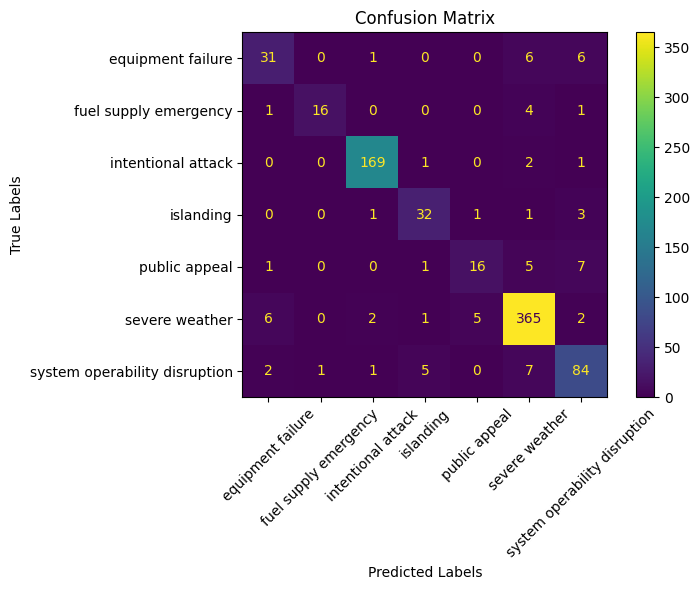

<Figure size 640x480 with 0 Axes>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = pl.fit(X_train, y_train)
y_pred = cross_val_predict(pl, X, y, cv=5)
print(f'Accuracy score = {metrics.accuracy_score(y, y_pred)}')
precision = metrics.precision_score(y, y_pred, average='macro')
recall = metrics.recall_score(y, y_pred, average='macro')
print(f'Precision score = {precision}')
print(f'Discovery rate = {1 - precision}')
print(f'Recall score = {recall}')
print(f'False negative rate = {1 - precision}')
print(f'F1-score = {2*precision*recall/(precision+recall)}')

# metrics.confusion_matrix(y, y_pred)
# metrics.plot_confusion_matrix(pl, X, y)

cm = metrics.confusion_matrix(y, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = metrics.plot_confusion_matrix(pl, X, y, ax=ax)
disp.ax_.set_title('Confusion Matrix')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding labels to the x-axis and y-axis
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Displaying the plot
plt.show()
plt.savefig('confusion_matrix_DT.png')

#### 4th Model : Gradient boosting

We apply the same method again to get our confusion matrix and the values of the different metrics.

In [ ]:
hyperparameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, None]
}


In [ ]:
pl = Pipeline([
    ('preprocessor', preproc), 
    ('grad-boost', GridSearchCV(GradientBoostingClassifier(), hyperparameters, cv=5))
])

pl.fit(X,y)
pl.named_steps['grad-boost'].best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [ ]:
scores = cross_val_score(pl, X, y, cv=5, scoring='accuracy')
# searcher.fit(X_train, y_train)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.82911392 0.82278481 0.84810127 0.84713376 0.75796178]
Mean accuracy: 0.8210191082802549
Standard deviation: 0.03304629524345365


Accuracy score = 0.8058375634517766
Precision score = 0.6900518710506603
Discovery rate = 0.30994812894933965
Recall score = 0.6080659905688351
False negative rate = 0.30994812894933965
F1-score = 0.6464699191348008


/home/ali-tz/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



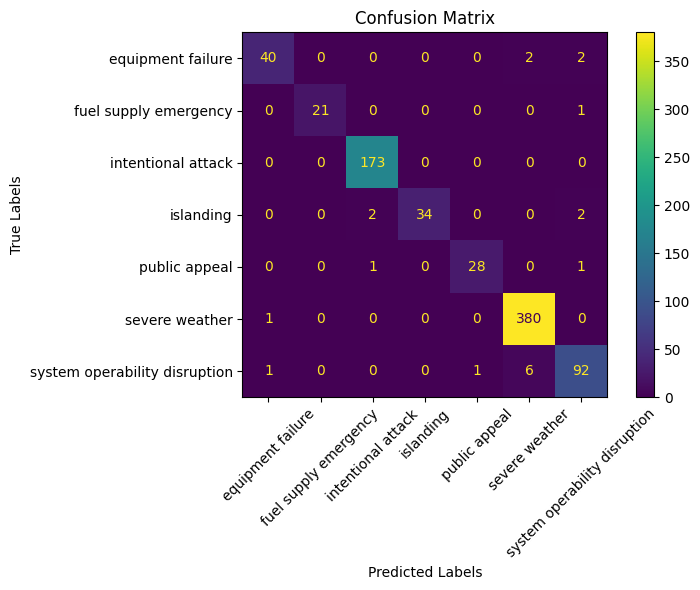

<Figure size 640x480 with 0 Axes>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = pl.fit(X_train, y_train)
y_pred = cross_val_predict(pl, X, y, cv=5)
print(f'Accuracy score = {metrics.accuracy_score(y, y_pred)}')
precision = metrics.precision_score(y, y_pred, average='macro')
recall = metrics.recall_score(y, y_pred, average='macro')
print(f'Precision score = {precision}')
print(f'Discovery rate = {1 - precision}')
print(f'Recall score = {recall}')
print(f'False negative rate = {1 - precision}')
print(f'F1-score = {2*precision*recall/(precision+recall)}')

# metrics.confusion_matrix(y, y_pred)
# metrics.plot_confusion_matrix(pl, X, y)

cm = metrics.confusion_matrix(y, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = metrics.plot_confusion_matrix(pl, X, y, ax=ax)
disp.ax_.set_title('Confusion Matrix')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding labels to the x-axis and y-axis
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Displaying the plot
plt.show()
plt.savefig('confusion_matrix_GB.png')


#### 5th Model : Ada boost

Same method again :

In [ ]:
hyperparameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}


In [ ]:
pl = Pipeline([
    ('preprocessor', preproc), 
    ('ada', GridSearchCV(AdaBoostClassifier(), hyperparameters, cv=5))
])

pl.fit(X,y)
pl.named_steps['ada'].best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [ ]:
scores = cross_val_score(pl, X, y, cv=5, scoring='accuracy')
# searcher.fit(X_train, y_train)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.65822785 0.70886076 0.68987342 0.66878981 0.65605096]
Mean accuracy: 0.6763605579295332
Standard deviation: 0.020186390673569213


Accuracy score = 0.6763959390862944
Precision score = 0.3482267914977344
Discovery rate = 0.6517732085022656
Recall score = 0.32403760984090557
False negative rate = 0.6517732085022656
F1-score = 0.33569701734854474


/home/ali-tz/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ali-tz/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



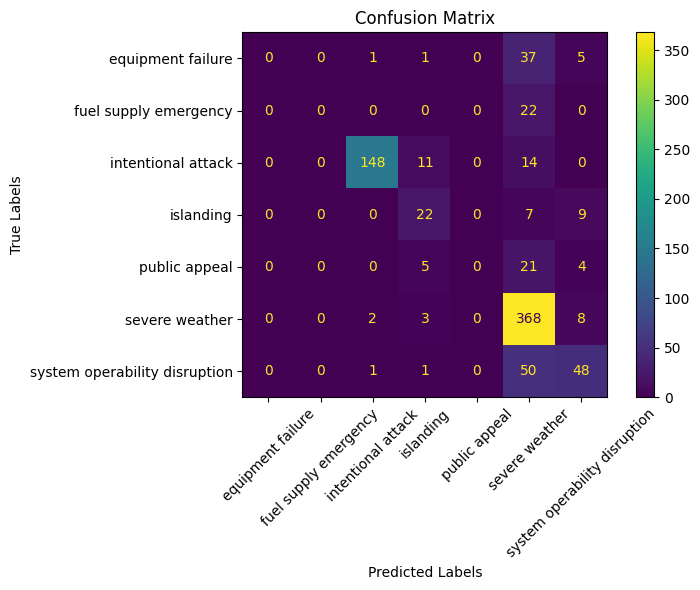

<Figure size 640x480 with 0 Axes>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = pl.fit(X_train, y_train)
y_pred = cross_val_predict(pl, X, y, cv=5)
print(f'Accuracy score = {metrics.accuracy_score(y, y_pred)}')
precision = metrics.precision_score(y, y_pred, average='macro')
recall = metrics.recall_score(y, y_pred, average='macro')
print(f'Precision score = {precision}')
print(f'Discovery rate = {1 - precision}')
print(f'Recall score = {recall}')
print(f'False negative rate = {1 - precision}')
print(f'F1-score = {2*precision*recall/(precision+recall)}')

# metrics.confusion_matrix(y, y_pred)
# metrics.plot_confusion_matrix(pl, X, y)

cm = metrics.confusion_matrix(y, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = metrics.plot_confusion_matrix(pl, X, y, ax=ax)
disp.ax_.set_title('Confusion Matrix')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding labels to the x-axis and y-axis
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Displaying the plot
plt.show()
plt.savefig('confusion_matrix_AB.png')

### Fairness Analysis

Let's evaluate our model

We first notice that we have much more data about severe weather and intentional attacks than the others, which could lead to bias.

In [ ]:
pow_outage['CAUSE.CATEGORY'].plot(kind = 'hist', bins = 5)

Finding the biggest source of false negative

Let's perform our permutation test.\
- Null hypothesis : The classifier's accuracy is the same for both extreme levels and centered levels of El Nino (El Nino is strong over 1.5 or under -1.5 and moderate or low between these two values), and any differences are due to chance.\
- Alternative Hypothesis: The classifier's accuracy is higher for extreme anomaly levels.
- Test statistic: Difference in accuracy (extreme minus centered).
- Significance level: 0.01.

In [ ]:
results = X.copy()
results['prediction'] = y_pred
results['tag'] = y
results['is_severe_weather'] =X['ANOMALY.LEVEL (numeric)'].apply(lambda x : abs(x) > 1.5).replace({True: 'Strong or more', False: 'Moderate or less'})
#results['is_severe_weather'] =X['DEMAND.LOSS.MW (Megawatt)'].apply(lambda x : x > 700).replace({True: 'Strong or more', False: 'Moderate or less'})
obs = results.groupby('is_severe_weather').apply(lambda x: metrics.accuracy_score(x['tag'], x['prediction'])).diff().iloc[-1]
obs



NameError: name 'X' is not defined

In [ ]:
diff_in_acc = []
for _ in range(100):
    s = (
        results[['is_severe_weather', 'prediction', 'tag']]
        .assign(is_young=results.is_severe_weather.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_severe_weather')
        .apply(lambda x: metrics.recall_score(x['tag'], x['prediction'], average='macro'))
        .diff()
        .iloc[-1]
    )
    
    diff_in_acc.append(s)

In [ ]:
fig = pd.Series(diff_in_acc).plot(kind='hist', histnorm='probability', nbins=20,
                            title='Difference in Accuracy (Young - Old)')
fig.add_vline(x=obs, line_color='red')
fig.update_layout(xaxis_range=[-5, 5])
fig.add_annotation(text='<span style="color:red">Observed Difference in Accuracy</span>', x=-0.075,showarrow=False, y=0.17)

In [ ]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:000m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
fig.write_image('output_plot.png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
